# Customer segmentation
## Task
Analyze the dataset and segment customers based on relevant parameters like Gender ,Age, or any other criteria you find important.
<br>
The columns are describing :
<br>
- CustomerID: Unique ID assigned to the customer
<br>
- Annual Income (k$): Annual Income of the customee
<br>
- Gender: Gender of the customer
<br>
- Age: Age of the customer
<br>
- Spending Score (1-100): Score assigned by the mall based on customer behavior and spending nature
<br>




# Tools and Libraries

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import plotly.graph_objects as go
pd.options.mode.chained_assignment = None


In [2]:
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


#  Exploratory Data Analysis (EDA) *Deep Look into the data*

Before implementing any model, first, we need to understand our data to know what we are dealing with. The data could be tricky and a few things could make the model don't work well.
We need to look for :
- Null values or empty values: Depending on their existence and how many of them, how we will deal with them.
- Data types: Sometimes, the data we get doesn't come with a suitable data type so we need to convert them or know which are numerical data and categorical data because every type has its own methods to deal with.
- Descriptive statistics: It's a branch of statistics that summarizes and describes the main features in our dataset. It gives us an insight and deeper understanding of our data.
- Outliers: are data points that significantly differ from the rest of the data in a dataset. Identifying and dealing with outliers is crucial in data analysis to ensure that statistical measures accurately reflect the underlying patterns in the data.


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Searching for any null values and knowing what are the datatypes of our data. we have 1 categorical data "Gender" and the rest of the columns are numerical data.

***Note:*** The customer ID column will not be used in the analysis as it's unique for the data set and will not give as much information.

In [4]:
data[["Age","Annual Income (k$)","Spending Score (1-100)"]].describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


This helps us to know our data better as it gives us information about how the data like, and where are the majority of our data. It's used for numerical data.
<br>
- Mean: It's the average of a set of numbers and It's calculated as follow:
     $$ \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i $$
where:
    - $\bar{x}$ : The mean.
    - $n$ : is the number of data points.
    - $x_i$ : represents each individual data point.
-Standard Deviation (STD) : It's a measure of how the data is spread out from the mean. It's calculated as follows:
$$ s = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x_i -\bar{x})^2} $$
where:
    - $s$ : The standard deviation.
    - $\bar{x}$ : The mean.
    - $n$ : is the number of data points.
    - $x_i$ : represents each individual data point.
-25%,50%, 75% percentile:
They represent specific points in the data.
25% is the value that 25% of the data lies below it.
50% (the median): It is the middle value of the data where 50% of the data lies bellow it and 50% of the data lies above it.
75%: the value which the 75% of the data lies below it.
It is always a better way to visualize those numbers so that it gives a better understanding'

Text(0, 0.5, "Distribution of customer's annual income ")

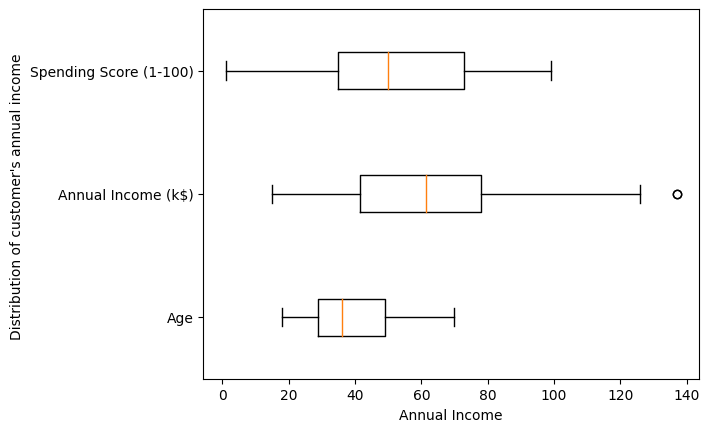

In [54]:
plt.boxplot(data[["Age","Annual Income (k$)","Spending Score (1-100)"]],labels=["Age","Annual Income (k$)","Spending Score (1-100)"], vert=False)
plt.xlabel("Annual Income")
plt.ylabel("Distribution of customer's annual income ")

## Categorical data :

In [53]:
data["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<Axes: >

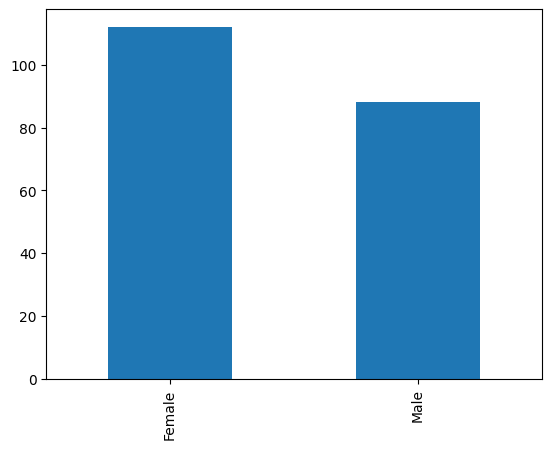

In [49]:
data["Gender"].value_counts().plot(kind="bar")

# Correlation Coefficients:

It's a measure of how the variables are related to each other. Its values vary from -1 to 1. Let's assume that we have 2 variables, the correlation coefficient will be :

1 (perfect positive correlation): As one variable increases, the other also increases proportionally.

0 (No correlation): Changes in one variable do not predict changes in the other.

-1(A perfect negative correlation): As one variable increases, the other decreases proportionally.

In case we have several variables, we put the correlation coefficients between every 2 variables into a correlation matrix.
Note: correlation coefficients are applied in numerical variables only. It will not be useful in categorical features. (based on my research)

In [7]:
cols=["Age","Annual Income (k$)","Spending Score (1-100)"]
corr=data[cols].corr()
corr.style.background_gradient(axis=None)

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


It's logical that one variable is correlated with itself. It makes sense. Based on these numbers, there are weak positive and negative correlations. It's not recommended to have highly correlated variables they have negative impacts on the model.

<Axes: >

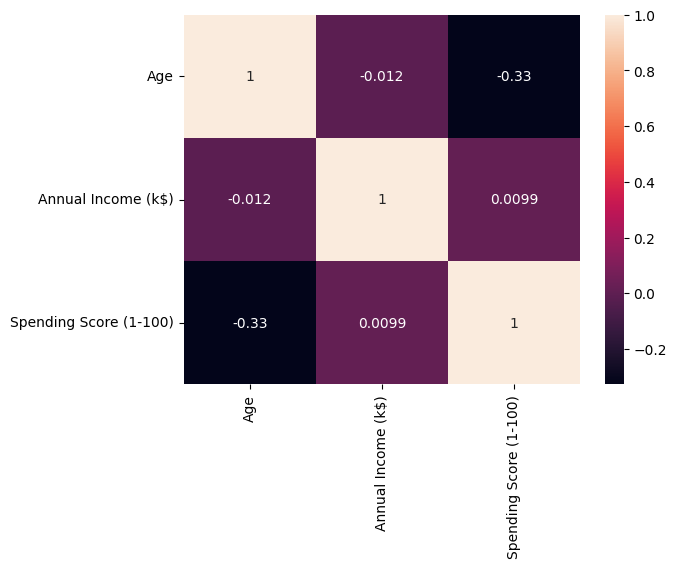

In [8]:
sns.heatmap(corr,annot=True)

# Visualizations:

Here, We are trying to visualize our data in several ways to find patterns or something interesting in the data.

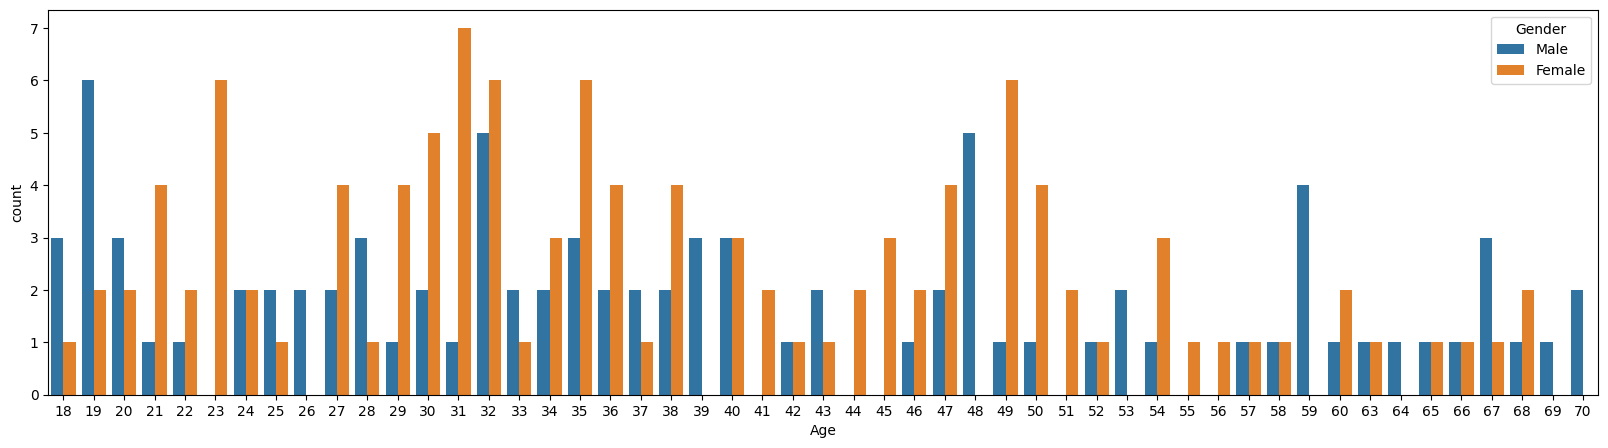

In [11]:
age_order = sorted(data['Age'].unique())
data['Age'] = pd.Categorical(data['Age'], categories=age_order, ordered=True)
plt.figure(figsize=(20,5))
sns.countplot(x='Age', hue='Gender', data=data);

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

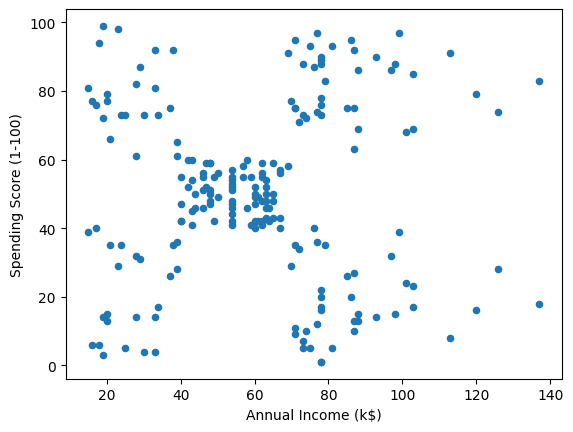

In [12]:
data.plot.scatter(x="Annual Income (k$)",y="Spending Score (1-100)")

<Axes: xlabel='Age', ylabel='Annual Income (k$)'>

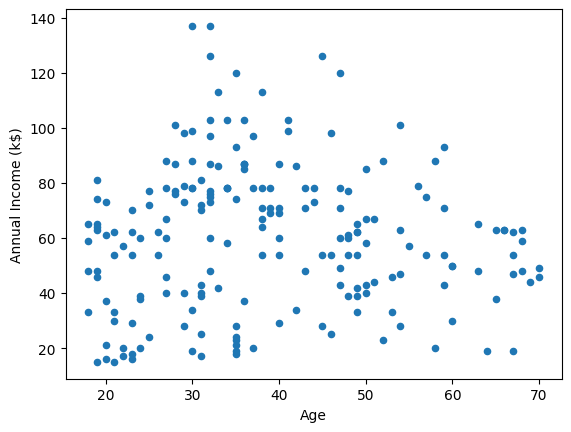

In [ ]:
data.plot.scatter(x="Age",y="Annual Income (k$)")

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

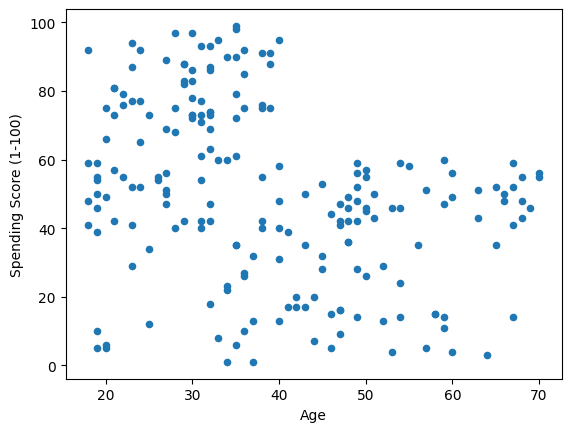

In [13]:
data.plot.scatter(x="Age",y="Spending Score (1-100)")

In [102]:
fig = px.scatter_3d(data, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
              color='Gender')

fig.update_layout(scene=dict(xaxis_title='Age', yaxis_title='Annual Income (k$)', zaxis_title='Spending Score (1-100)'))

fig.show()



# Kmeans Algorithm:

It's an unsupervised learning algorithm that aims to assign each data point to a group, then data points get clustered based on similar features.

**Terminologies:**
- Centroids: center of each cluster
- Inertia (the data point of a cluster and its centroid): It's a measure
that describes how the clusters spread. whenever the inertia is smaller, the clustering is better. It's calculated as the sum of squared distances between each point and it's assigned cluster centroid as follows :
$$I = \sum_{i=1}^{n} \|x_i - c_{j(i)}\|^2$$

<center>We should choose the number of clusters to be entered into our model. There are a few methods that help us choose the best number of clusters
<br>
like the Elbow method and silhoutte score</center>
<br>


- Elbow Method: It's a method to find the best number of clusters. we need to calculate the inertia for several k-means models with different numbers of clusters. When the cost starts to decrease at a slower rate, is considered a good estimate for the optimal number of clusters.

- Silhouette score(centroid of a cluster and the data in another cluster): It's a measure of how well-defined and separated the clusters are. Whenever it's higher, the better

**Steps:**
   1. Choose the number of clusters that you need (based on analysis, budget,.....etc)
   2. put randomly the centroid's points ( the same number of clusters)
   3. assign each point to the nearest cluster's centroid. then, calculate the distance between the data point and the centroid. Based on the distances we get, we assign the data with the nearest distance(smaller) to its centroid. It's calculated as follows for the 2d plan:
   <br>
   $$d_{2D}(X, C) = \sqrt{(x_X - x_C)^2 + (y_X - y_C)^2}$$
   **where:**
   <br>
   - $(x_x,y_x)$  : the location of a data point
   - $(x_c,y_c)$  :the location of the centroid (first centroid location is choosen randomly)

   4.We use points with the smallest distance to its cluster's centroid to update the location of a new centroid by calculating the average of those points of that cluster.
   <br>
   $$c_j = \frac{1}{N_j} \sum_{i=1}^{N} x_i $$
   where:
   <br>
   $c_j$ : the centroid of cluster location $j$
   <br>
   $N$ : numbers of data points in that cluster ( the points achived the smallest distances)
   <br>
   $x_j$ : the location of the $i$-th data point in cluster j
   <br>
   5- Repeat from step 3


  We need to choose the best number of clusters that could represent the data.
  Find the n of clusters for 2 features (Annual Income (k$), Spending Score (1-100))

In [82]:
df=data[["Annual Income (k$)","Spending Score (1-100)"]]
n_clusters=range(2,13)
iner_scores=[]     # to save the inertia value for every model version
silscores=[]       # to save the silhouette score for every model version
for k in n_clusters:
  model=KMeans(n_clusters=k,random_state=42,n_init='auto')
  model.fit(df)
  iner_scores.append(model.inertia_)
  silscores.append(silhouette_score(df,model.labels_))

print("Inertia: ",iner_scores)
print()
print("Silhouette_score: ",silscores)

Inertia:  [181363.59595959593, 132087.72428243398, 73880.64496247195, 44448.4554479337, 40825.16946386947, 33859.371012691, 28437.45732804018, 21862.092672182895, 19787.67055496686, 18580.87864134964, 16879.44948644657]

Silhouette_score:  [0.2968969162503008, 0.38353342550359726, 0.4937945814354117, 0.553931997444648, 0.5128405328004378, 0.5036104992584096, 0.4524920580538445, 0.4553729779390266, 0.44096594426188596, 0.41361512691192914, 0.39529102105491554]


# Elbow Method Plot:

Text(0, 0.5, 'Inertia')

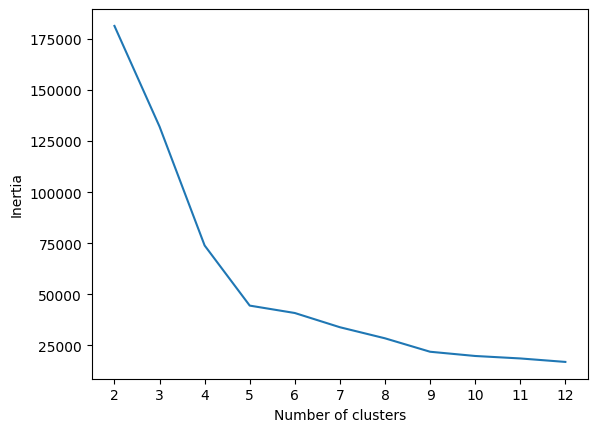

In [84]:
plt.plot(n_clusters,iner_scores)
plt.xticks(np.arange(2,13,1));
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

# Silhouette Scores Plot:

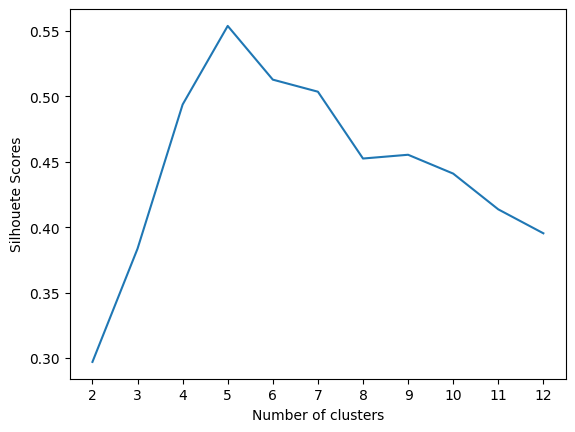

In [86]:
plt.plot(n_clusters,silscores)
plt.xticks(np.arange(2,13,1))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouete Scores");

We found from the silhouette score that the max score when the number of clusters equals 5.

In [88]:
final_model=KMeans(n_clusters=5,random_state=42,n_init='auto')
final_model.fit(df)

KMeans(n_clusters=5, n_init='auto', random_state=42)

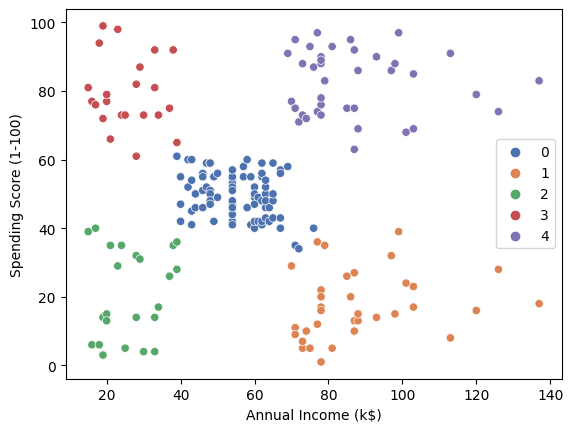

In [89]:
sns.scatterplot(x=df["Annual Income (k$)"],y=df["Spending Score (1-100)"],hue=final_model.labels_,palette="deep");

#Using 3 features Age,Annual Income (k$),Spending Score (1-100)

In [90]:
mask=["Age","Annual Income (k$)","Spending Score (1-100)"]
df_mask=data[mask]
df_mask.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [91]:
n_clusters=range(2,13)
iner_scores=[]
silscores=[]
for k in n_clusters:
  model=KMeans(n_clusters=k,random_state=42,n_init='auto')
  model.fit(df_mask)
  iner_scores.append(model.inertia_)
  silscores.append(silhouette_score(df_mask,model.labels_))

print("Inertia: ",iner_scores)
print()
print("Silhouette_score: ",silscores)

Inertia:  [219860.00080653292, 143342.751571706, 104374.15985112858, 75493.84464013917, 58336.73939279637, 51530.36916574653, 48531.83075945793, 46575.69653867872, 39936.204633916816, 35766.220400723716, 33399.40017824566]

Silhouette_score:  [0.2544536600154355, 0.3839349967742105, 0.40570340605429833, 0.43980833648377404, 0.45094537370653903, 0.4375126798637538, 0.39107056296518083, 0.37201931384438863, 0.36278327018005, 0.367015680709402, 0.3563874369537018]


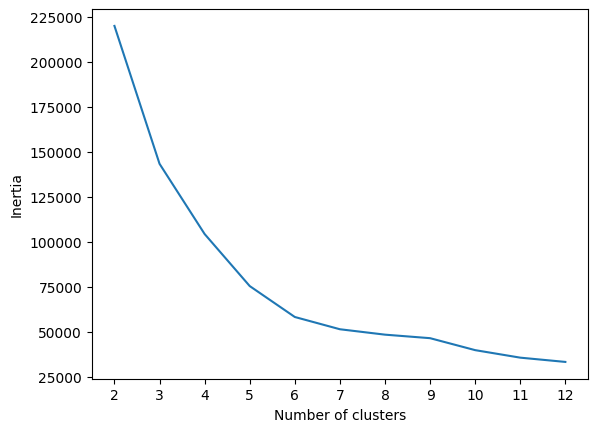

In [92]:
plt.plot(n_clusters,iner_scores)
plt.xticks(np.arange(2,13,1))
plt.xlabel("Number of clusters")
plt.ylabel("Inertia");

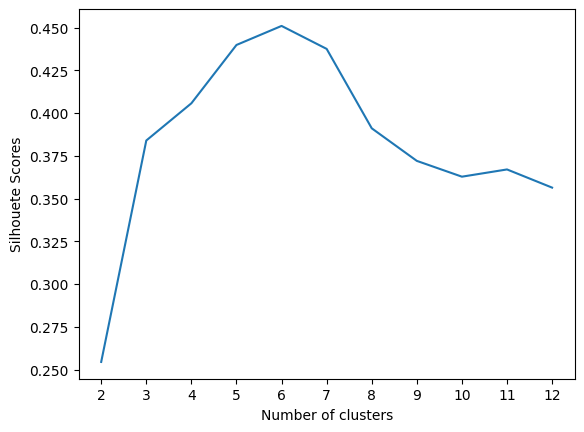

In [93]:
plt.plot(n_clusters,silscores)
plt.xticks(np.arange(2,13,1))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouete Scores");

In case of using the 3 features, we found that the best number of clusters is 6 which achive the highest silhouette score.

In [94]:
final_model=KMeans(n_clusters=6,random_state=42,n_init='auto')
final_model.fit(df_mask)


KMeans(n_clusters=6, n_init='auto', random_state=42)

In [97]:
df_mask['cluster'] = final_model.labels_
fig = go.Figure()

for cluster in df_mask['cluster'].unique():
    cluster_data = df_mask[df_mask['cluster'] == cluster]
    fig.add_trace(go.Scatter3d(
        x=cluster_data['Age'],
        y=cluster_data['Annual Income (k$)'],
        z=cluster_data['Spending Score (1-100)'],
        mode='markers',
        marker=dict(size=5),
        name=f'Cluster {cluster}'
    ))

# Set layout
fig.update_layout(scene=dict(
                    xaxis_title='Age',
                    yaxis_title='Annual Income (k$)',
                    zaxis_title='Spending Score (1-100)'),
                    title='3D Scatter Plot of Clusters')

# Show the plot
fig.show()
fig.write_image("After Clustering.png")


**Note:**
<br>
I didn't use the "Gender feature" as **I think**, it will not affect the model. The KMeans algorithm is used for numerical data only. For categorical data, there is another algorithm to deal with it called KModes. In case of mixed data (numerical and categorical), there is an algorithm for large data sets introduced by ZHEXUE HUANG for it called K-Prototypes.
Link :__[K-Prototypes Research](https://link.springer.com/article/10.1023/A:1009769707641)__